<a href="https://colab.research.google.com/github/roshanappa/Deep-Learning-Models./blob/master/Breast_Cancer_Classification_with_Conv1D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [0]:
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [0]:
data = pd.read_csv('/content/data.csv')

In [0]:
pd.pandas.set_option('display.max_columns',None)

In [122]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [0]:
data.drop(columns=['Unnamed: 32','id'],inplace=True)

In [124]:
data.tail()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.256,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.463,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.075,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.595,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,0.3857,1.428,2.548,19.15,0.007189,0.00466,0.00000,0.00000,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [125]:
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [126]:
data.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [127]:
data.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

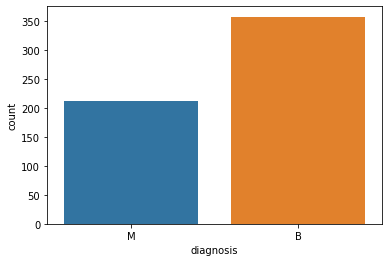

In [128]:
sns.countplot(data['diagnosis'])
plt.show()

In [129]:
data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [0]:
c = {'B':0,'M':1}
data['diagnosis']=data['diagnosis'].map(c)

In [131]:
data['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [0]:
x = data.drop(columns=['diagnosis'])
y = data['diagnosis']

In [0]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,train_size=0.80,stratify=y)

In [134]:
x_train.shape,x_test.shape

((455, 30), (114, 30))

In [135]:
y_train.value_counts()

0    285
1    170
Name: diagnosis, dtype: int64

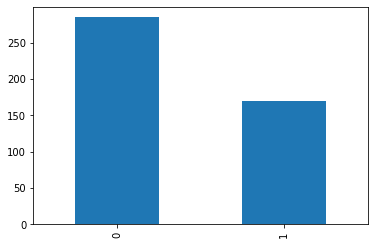

In [136]:
y_train.value_counts().plot(kind='bar')
plt.show()

In [0]:
from imblearn.over_sampling import SMOTE

In [0]:
sm = SMOTE(sampling_strategy=1,random_state=42,k_neighbors=5)

In [0]:
X_train,Y_train = sm.fit_sample(x_train,y_train)

In [0]:
Y_train = pd.Series(Y_train)

In [141]:
Y_train.value_counts()

1    285
0    285
dtype: int64

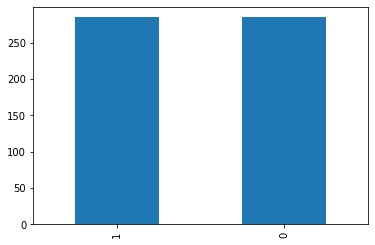

In [142]:
Y_train.value_counts().plot(kind='bar')
plt.show()

## Model Creation.

In [143]:
X_train.shape,x_test.shape

((570, 30), (114, 30))

In [0]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(x_test)

In [0]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test  = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [146]:
X_train.shape,X_test.shape

((570, 30, 1), (114, 30, 1))

In [0]:
from tensorflow.keras.layers import Dense,Dropout,MaxPool1D,Conv1D,Flatten
from tensorflow.keras import Sequential

In [0]:
model = Sequential()
model.add(Conv1D(128,kernel_size=3,activation='relu',input_shape=[30,1]))
model.add(Dropout(0.10))
model.add(MaxPool1D(2))

model.add(Conv1D(56,kernel_size=3,activation='relu'))
model.add(Dropout(0.10))
model.add(MaxPool1D(2))

model.add(Flatten())
model.add(Dense(120,activation='relu'))
model.add(Dropout(0.10))
model.add(Dense(1,activation='sigmoid'))

In [149]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 28, 128)           512       
_________________________________________________________________
dropout_4 (Dropout)          (None, 28, 128)           0         
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 14, 128)           0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 12, 56)            21560     
_________________________________________________________________
dropout_5 (Dropout)          (None, 12, 56)            0         
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 6, 56)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 336)              

In [0]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [151]:
history = model.fit(X_train,Y_train,batch_size=20,epochs=20,verbose=1,validation_split=0.20)

Epoch 1/20
23/23 [==============================] - 0s 11ms/step - loss: 0.3681 - accuracy: 0.8333 - val_loss: 0.2871 - val_accuracy: 0.8684
Epoch 2/20
23/23 [==============================] - 0s 7ms/step - loss: 0.1632 - accuracy: 0.9452 - val_loss: 0.1304 - val_accuracy: 0.9474
Epoch 3/20
23/23 [==============================] - 0s 6ms/step - loss: 0.1018 - accuracy: 0.9649 - val_loss: 0.1189 - val_accuracy: 0.9561
Epoch 4/20
23/23 [==============================] - 0s 6ms/step - loss: 0.0835 - accuracy: 0.9715 - val_loss: 0.1091 - val_accuracy: 0.9561
Epoch 5/20
23/23 [==============================] - 0s 6ms/step - loss: 0.0756 - accuracy: 0.9737 - val_loss: 0.0898 - val_accuracy: 0.9649
Epoch 6/20
23/23 [==============================] - 0s 5ms/step - loss: 0.0738 - accuracy: 0.9737 - val_loss: 0.0741 - val_accuracy: 0.9737
Epoch 7/20
23/23 [==============================] - 0s 6ms/step - loss: 0.0731 - accuracy: 0.9737 - val_loss: 0.0781 - val_accuracy: 0.9737
Epoch 8/20
23/23 [=

## Accuracy and Learning Curve

In [152]:
y_pred = model.predict_classes(X_test)
y_pred = y_pred.ravel()
y_pred

array([0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1], dtype=int32)

In [0]:
y_predction =model.predict(X_test)
y_predction

In [0]:
np.argmax(y_predction[0])

In [0]:
class_name[np.argmax(y_predction[0])]

In [0]:
classes_name =['B','M']

In [0]:
def class_name(X_test,index):
  y_predction  = model.predict(X_test)
  predict_class = np.argmax(y_predction[index])
  clas_name     = classes_name[predict_class]
  return clas_name

In [156]:
class_name(X_test,0)

'B'

In [157]:
mat = confusion_matrix(y_test,y_pred)
mat

array([[70,  2],
       [ 2, 40]])

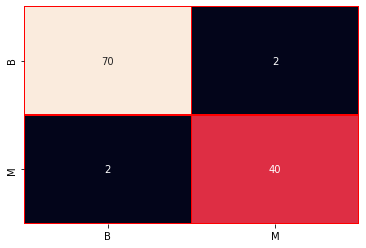

In [159]:
sns.heatmap(mat,annot=True,fmt='d',linewidths=0.5,linecolor='red',cbar=False,xticklabels=classes_name,yticklabels=classes_name)
plt.show()

In [160]:
print('Accuarcy :-',accuracy_score(y_test,y_pred))

Accuarcy :- 0.9649122807017544


**Learning Curve.**

In [161]:
history.history

{'accuracy': [0.8333333134651184,
  0.9451754093170166,
  0.9649122953414917,
  0.9714912176132202,
  0.9736841917037964,
  0.9736841917037964,
  0.9736841917037964,
  0.9780701994895935,
  0.9758771657943726,
  0.9736841917037964,
  0.9780701994895935,
  0.9890350699424744,
  0.984649121761322,
  0.984649121761322,
  0.984649121761322,
  0.9868420958518982,
  0.9934210777282715,
  0.9912280440330505,
  0.9912280440330505,
  0.9912280440330505],
 'loss': [0.368110328912735,
  0.16318929195404053,
  0.10183742642402649,
  0.0835215300321579,
  0.07564806193113327,
  0.07376060634851456,
  0.07309557497501373,
  0.058880213648080826,
  0.059850919991731644,
  0.06270914524793625,
  0.06407903879880905,
  0.04877155274152756,
  0.04629527032375336,
  0.0395948626101017,
  0.04249047860503197,
  0.0388566218316555,
  0.031243901699781418,
  0.028510883450508118,
  0.02661122940480709,
  0.028904516249895096],
 'val_accuracy': [0.8684210777282715,
  0.9473684430122375,
  0.9561403393745422,

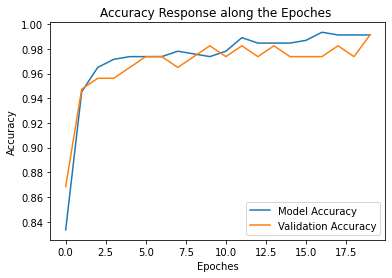

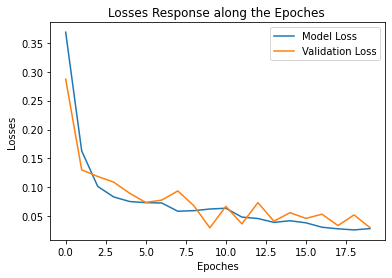

In [162]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy Response along the Epoches ')
plt.xlabel('Epoches')
plt.ylabel('Accuracy')
plt.legend(['Model Accuracy','Validation Accuracy'])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Losses Response along the Epoches ')
plt.xlabel('Epoches')
plt.ylabel('Losses')
plt.legend(['Model Loss','Validation Loss'])
plt.show()

In [164]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        72
           1       0.95      0.95      0.95        42

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



## Validate the Model.

In [0]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [167]:
def set_model():
  model = Sequential()
  model.add(Conv1D(128,kernel_size=3,activation='relu',input_shape=[30,1]))
  model.add(Dropout(0.10))
  model.add(MaxPool1D(2))

  model.add(Conv1D(56,kernel_size=3,activation='relu'))
  model.add(Dropout(0.10))
  model.add(MaxPool1D(2))

  model.add(Flatten())
  model.add(Dense(120,activation='relu'))
  model.add(Dropout(0.10))
  model.add(Dense(1,activation='sigmoid'))
  model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
  return model
model
classifier = KerasClassifier(set_model,batch_size=20,epochs=20)
accuracy = cross_val_score(classifier,X_train,Y_train,scoring='accuracy',cv=10,n_jobs=-1,verbose=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   35.8s finished


In [168]:
accuracy

array([0.98245614, 0.98245614, 0.98245614, 0.94736842, 0.96491228,
       0.96491228, 0.98245614, 0.96491228, 0.98245614, 0.96491228])

In [169]:
print('Accuarcies mean :-',accuracy.mean())
print('Accuracies Standard Devaition :-',accuracy.std())

Accuarcies mean :- 0.9719298245614036
Accuracies Standard Devaition :- 0.011637279966159283


From the above we can see the accuarcies not having the so much diffrences as well as mean is pretty much closer previous one.